In [6]:
## import basic packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

FILE_PATH = './winemag-data-130k-v2.csv'

## create DataFrame from csv file
df = pd.read_csv(FILE_PATH, index_col=0)
len_total = df.shape[0]
print('It has {0} items in total.'.format(len_total))

It has 129971 items in total.


In [7]:
## Abstract
# country:
print(df['country'].value_counts())

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
# points:
print('points:')
print('max: {0}'.format(df['points'].max()))
print('min: {0}'.format(df['points'].min()))
print('mean: {0}'.format(df['points'].mean()))
print('median: {0}'.format(df['points'].median()))
print('quantile 1: {0}'.format(df['points'].quantile(0.25)))
print('quantile 2: {0}'.format(df['points'].quantile(0.5)))
print('quantile 3: {0}'.format(df['points'].quantile(0.75)))
print('missing: {0}'.format(df.shape[0] - df['points'].count()))

In [ ]:
# price:
print('price:')
print('max: {0}'.format(df['price'].max()))
print('min: {0}'.format(df['price'].min()))
print('mean: {0}'.format(df['price'].mean()))
print('median: {0}'.format(df['price'].median()))
print('quantile 1: {0}'.format(df['price'].quantile(0.25)))
print('quantile 2: {0}'.format(df['price'].quantile(0.5)))
print('quantile 3: {0}'.format(df['price'].quantile(0.75)))
print('missing: {0}'.format(df.shape[0] - df['price'].count()))

In [ ]:
# taster name:
print(df['taster_name'].value_counts())

In [ ]:
# variety:
print(df['variety'].value_counts())

In [9]:
# define a method to process related figures
def show_figures(df):
    # Histogram of points
    histogram_points = df['points'].hist(
        grid=False, xlabelsize=0.4, bins=20).get_figure()
    plt.title('histogram of points')
    plt.show()
    # Q-Q plot of points
    stats.probplot(df['points'], dist='norm', plot=plt)
    plt.title('Q-Q plot of points')
    plt.show()

    # Histogram of price
    # ############ CAUTION ############
    # since price values mostly falls in (0,100), we only show the histogram of prices under 100.
    histogram_price = df['price'][df['price'] < 100].hist(
        grid=False, xlabelsize=10, bins=20).get_figure()
    plt.title('histogram of price')
    plt.show()
    # Q-Q plot of price
    stats.probplot(df['price'][df['price'] < 100], dist='norm', plot=plt)
    plt.title('Q-Q plot of price')
    plt.show()

    # Boxplot of points
    boxplot_points = df.boxplot(column=['points'])
    plt.title('Boxplot of points')
    plt.show()
    # Boxplot of price
    boxplot_price = df.boxplot(column=['price'])
    plt.title('Boxplot of price')
    plt.show()

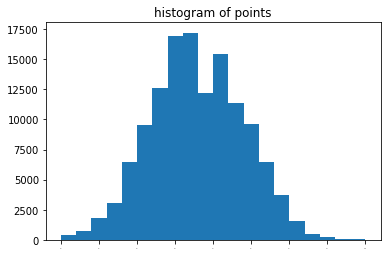

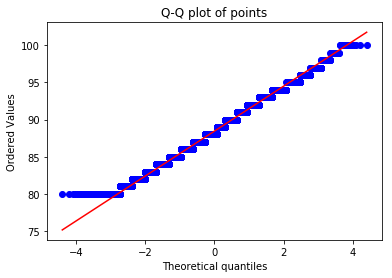

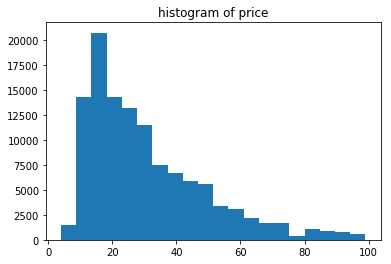

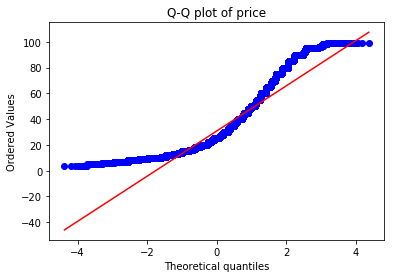

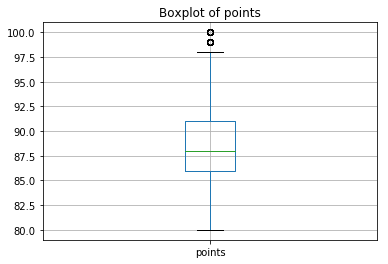

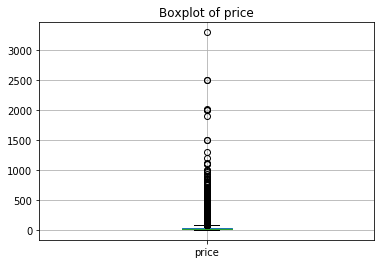

In [10]:
show_figures(df)

Now we have 120975 items in total.
We deleted 8996 items.


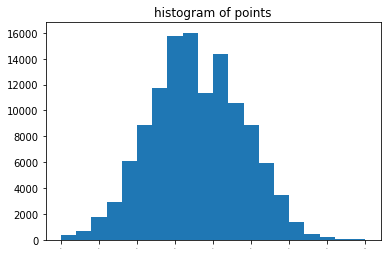

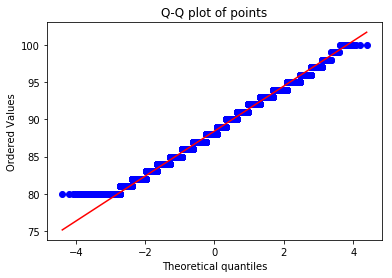

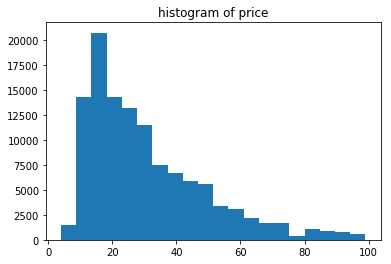

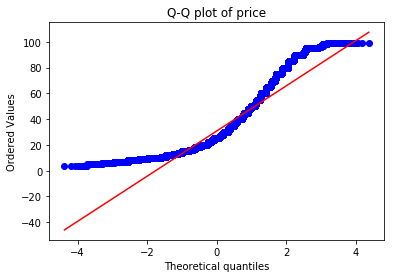

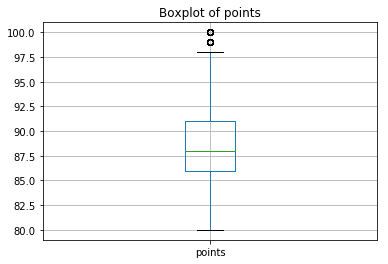

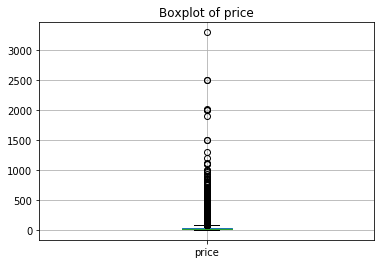

In [11]:
## Begin processing
# 1.将缺失部分剔除
# delete items with empty price value(Attribute points has no empty value)
df1 = df.dropna(subset=['price'])
print('Now we have {0} items in total.'.format(df1.shape[0]))
print('We deleted {0} items.'.format(len_total - df1.shape[0]))
show_figures(df1)

In [ ]:
# 2.用最高频率值来填补缺失值
# fillna price (Attribute points has no empty value)
df2 = df.copy()
df2_price = df['price'].fillna(df['price'].mode()[0])
df2['price'] = df2_price
show_figures(df2)

In [ ]:
# 3.通过属性的相关关系来填补缺失值
# 由于缺失属性price和其他属性没有潜在联系，此部分略过，不做处理。

In [ ]:
# 4.通过数据对象之间的相似性来填补缺失值
# price <-> designation:
# if designation_a == designation_b then fill price_b with price_a

# ############ CAUTION ############
# it tooks minutes to fill
# ############ CAUTION ############

df4 = df.copy()

# # firstly, we delete the rows with empty designation.
print('before delete: {0}'.format(df4.shape[0]))
df4 = df4.loc[df4['designation'].isnull() == False]
print('after delete: {0}'.format(df4.shape[0]))


while len(df4[df4['price'].isnull()]) > 0:

    df_missing = df4[df4['price'].isnull()]

    designation = df_missing.iloc[0]['designation']
    country = df_missing.iloc[0]['country']
    region_1 = df_missing.iloc[0]['region_1']
    # filter: designation, country, and region_1
    price = df[(df['designation'] == designation)
               & (df['country'] == country)
               & (df['region_1'] == region_1)
               & (df['price'].isnull() == False)]['price']
    if len(price) == 0:
        # if we can't find valid items then delete it/them
        df4 = df4.loc[df['designation'] != designation]
    else:
        # 取众数来填充空值
        x = price.mode()[0]
        tmp = df4.loc[(df4['designation'] == designation)
                      & (df4['price'].isnull())]
        tmp['price'] = x
        df4.update(tmp)

show_figures(df4)